### gmarket 베스트 200 상품 데이터 수집
- 상품 데이터 수집
- 상품 이미지 데이터 수집

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# 1. 웹 서비스 분석 : url

In [6]:
url = 'http://corners.gmarket.co.kr/Bestsellers'

In [3]:
# 2. request(url) > response : html

In [7]:
response = requests.get(url)
response

<Response [200]>

In [4]:
# 3. html(str) > bs, css-selecter > DataFrame

In [11]:
# bs 객체 만들기
dom = BeautifulSoup(response.text, 'html.parser')

In [21]:
# 상품 리스트 200개 선택하기
elememts = dom.select('#gBestWrap > div > div:nth-child(5) > div:nth-child(3) > ul > li')
len(elememts)

200

In [52]:
elememts[0].select('.o-price')

[<div class="o-price"><span><span>79,900원</span></span></div>]

In [58]:
# 각 상품에서 데이터(상품명, 원가, 판매가, 이미지 URL, 상세 페이지 링크)
elememt = elememts[0]
data = {
    'name' : elememt.select_one('.itemname').text,
    'price' : elememt.select_one('.o-price').text,
    'sales' : elememt.select_one('.s-price').text,
    'img' : elememt.select_one('img.lazy').get('data-original'),
    'link' : elememt.select_one('.itemname').get('href'),
}

data

{'name': '씨투엠에듀 도형학습지 플라토 유치~초등 단계별 선택구매(전4권)',
 'price': '79,900원',
 'sales': '\n24,000원\n69%\n',
 'img': 'http://gdimg.gmarket.co.kr/962002144/still/300?ver=2022022214',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=962002144&ver=637811369642031158'}

In [61]:
# 데이터 프레임으로 만들기
datas = [{'name' : elememt.select_one('.itemname').text,
            'price' : elememt.select_one('.o-price').text,
            'sales' : elememt.select_one('.s-price').text,
            'img' : elememt.select_one('img.lazy').get('data-original'),
            'link' : elememt.select_one('.itemname').get('href'),} for elememt in elememts]
df = pd.DataFrame(datas)
df.tail(2)

,name,price,sales,img,link
198,[설화수]설화수 순행 클렌징폼 200ml +미니어처 5종증정,"39,900원","\n29,900원\n25%\n",http://gdimg.gmarket.co.kr/1870699583/still/30...,http://item.gmarket.co.kr/Item?goodscode=18706...
199,[더블에이]더블에이 A4 복사용지 80g 4000매 2BOX/A4용지,"48,960원","\n42,600원\n12%\n",http://gdimg.gmarket.co.kr/772056310/still/300...,http://item.gmarket.co.kr/Item?goodscode=77205...


In [5]:
# 4. download images

In [68]:
import os

# datas 디렉토리가 없으면 datas 디렉토리를 만들어라
if not os.path.exists('datas') :
    os.makedirs('datas')

In [70]:
img = df.loc[0, 'img']
print(img)

http://gdimg.gmarket.co.kr/962002144/still/300?ver=2022022214


In [71]:
response = requests.get(img)

In [72]:
with open('datas/test.png', 'wb') as file :
    file.write(response.content)

In [73]:
from PIL import Image as pil

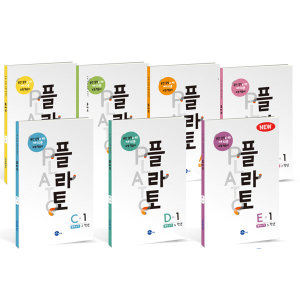

In [74]:
pil.open('datas/test.png')

In [75]:
df.head(2)

,name,price,sales,img,link
0,씨투엠에듀 도형학습지 플라토 유치~초등 단계별 선택구매(전4권),"79,900원","\n24,000원\n69%\n",http://gdimg.gmarket.co.kr/962002144/still/300...,http://item.gmarket.co.kr/Item?goodscode=96200...
1,[길림양행]HBAF 바프 아몬드 5+1봉 마음대로 골라담기,"24,750원","\n16,500원\n33%\n",http://gdimg.gmarket.co.kr/2354408470/still/30...,http://item.gmarket.co.kr/Item?goodscode=23544...


In [91]:
for idx, data in df[:15].iterrows() :
    filename = '0' * (3 - len(str(idx))) + str(idx)
    print(idx, end=' ')
    response = requests.get(data['img'])
    with open(f'datas/{filename}.png', 'wb') as file :
        file.write(response.content)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 